In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
#LIF properties

cap = 5                  #(uF)
res = 2                  #(kOhm)
u_rest = 0               #(mV)
t_ref = 5                #(msec)
u_thres = 1              #(mV)

In [121]:
T = 100                  #(msec)
dt = 0.125                 #(msec)
t_rest = 0

time = np.arange(0, T, dt)

In [144]:
def simulate_model(I, time, dt=0.125, t_ref=5, u_thres=1, u_rest=0, cap=5, res=2, t_rest_init=0):
  
    tau = cap * res
    t_rest = t_rest_init
    u = np.zeros_like(time)
    
    for k, t in enumerate(time):
        
        if t > t_rest:
            
            du = (-u[k-1] + I[k]*res)/tau * dt
            u[k] = u[k-1] + du
            if u[k] >= u_thres:
                t_rest = t + t_ref
            
    fig, axs = plt.subplots(2, figsize=(16,14))
    
    axs[0].plot(time, I)
    axs[0].set_title('Input current vs Simulation time')
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel('Current (mV)')
    
    axs[1].plot(time, u)
    axs[1].set_title('Membrane potential vs Simulation time')
    axs[1].set_xlabel('Simulation time (ms)')
    axs[1].set_ylabel('Potential (mV)')
    

In [145]:
def plot_frequency(I, t_ref=5, u_thres=1, cap=5, res=2):
    
    tau = res * cap
    T = t_ref + tau * np.log(res*I/(res*I - u_thres))
    
    firing_freq = 1/T
    
    plt.plot(I, firing_freq)

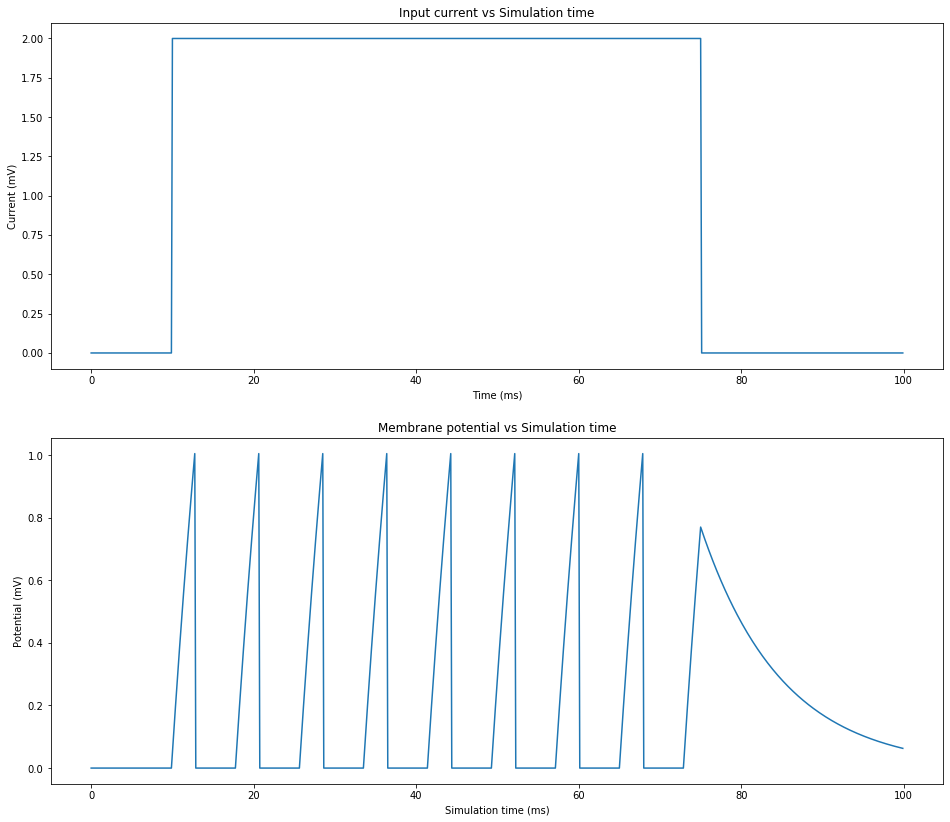

In [146]:
I = np.zeros_like(time)
start = int(10/dt)
end = int(75/dt) + 1
I[start:end] = 2

simulate_model(I, time)


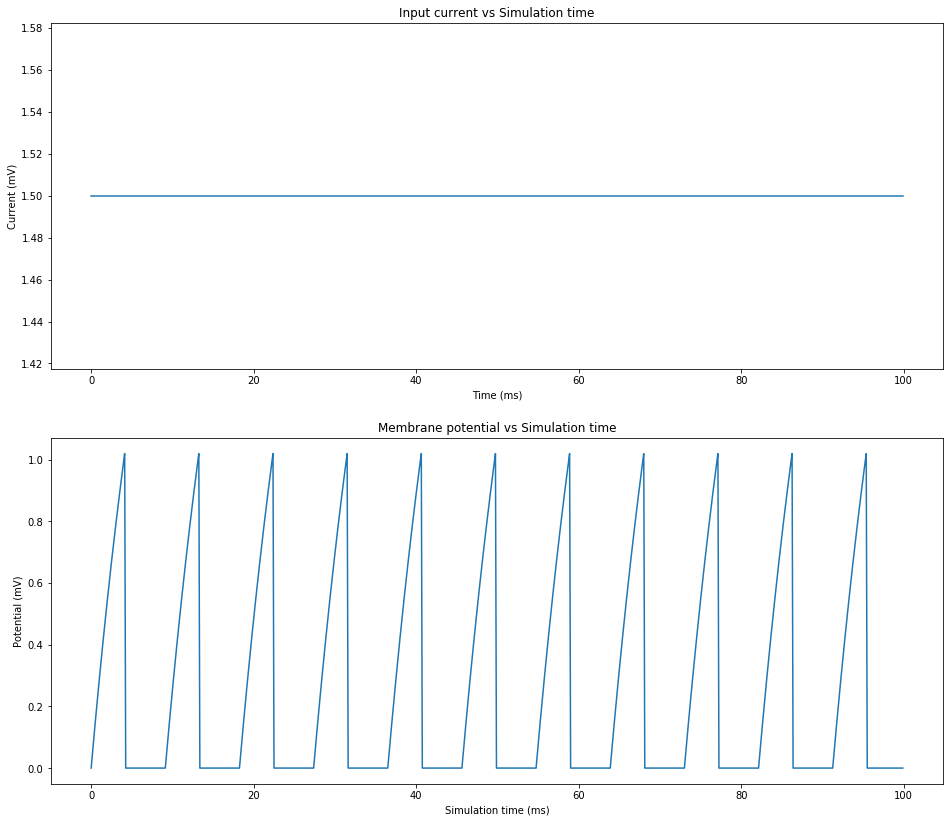

In [147]:
I = 1.5 + np.zeros_like(time)

simulate_model(I, time)

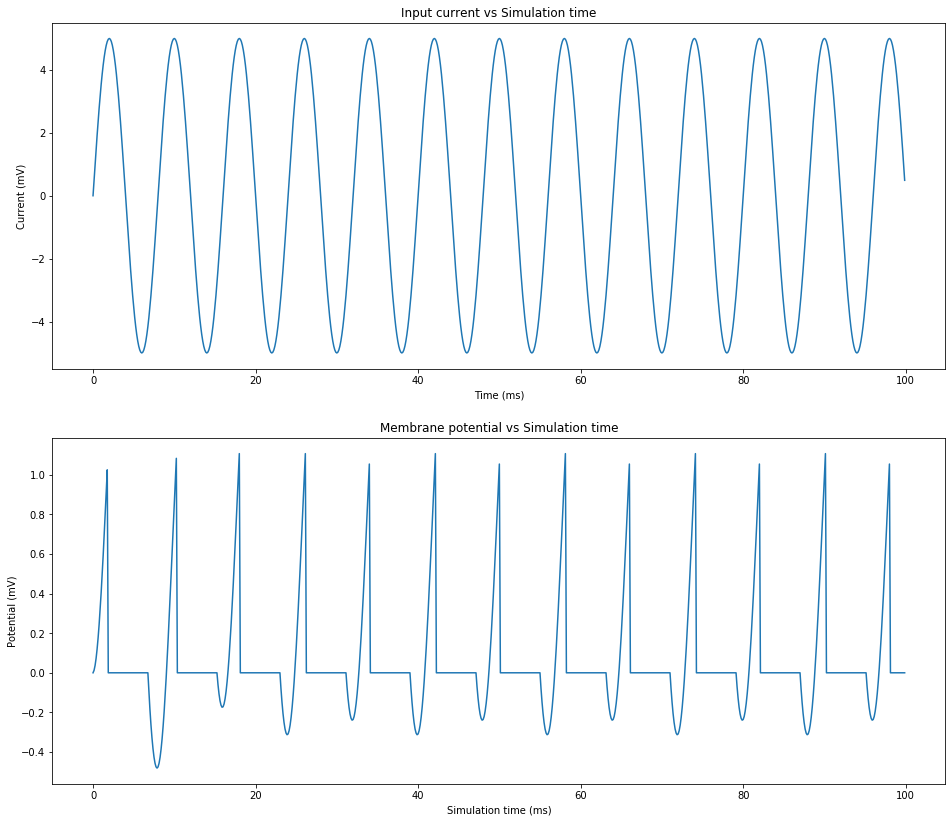

In [148]:
w = np.pi*45/180
I = 5 * np.sin(w*time)

simulate_model(I, time)

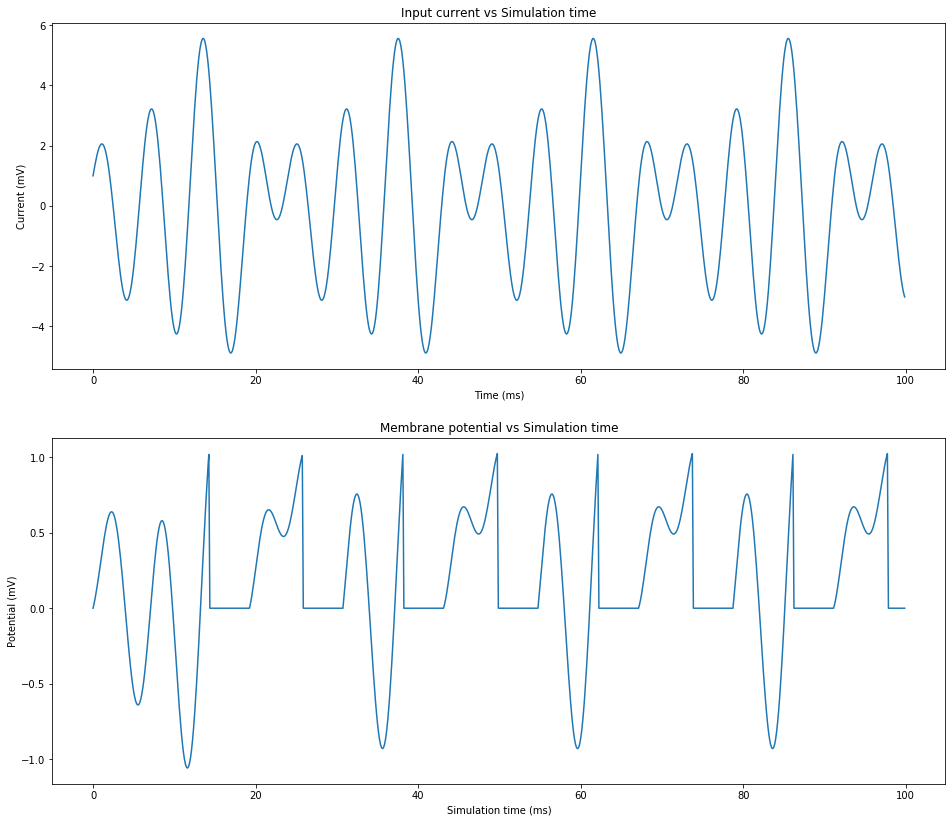

In [150]:
w1 = np.pi*45/180
w2 = np.pi*60/180
w3 = np.pi*30/180

I = -2 * np.sin(w1*time)
I += 3 * np.sin(w2*time)
I += np.cos(w3*time)

simulate_model(I, time)

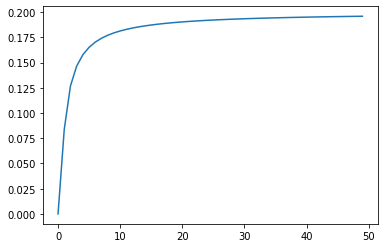

In [140]:
I = np.arange(0, 50)

plot_frequency(I)